In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 23.4 MB/s eta 0:00:00


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Segmentation/Segment Dataset

/content/drive/MyDrive/Segmentation/Segment Dataset


In [7]:
!yolo segment mode=train model=yolo11m-seg.pt data=data.yaml epochs=15 imgsz=640

100% 43.3M/43.3M [00:00<00:00, 127MB/s]
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [12]:
!yolo segment val model= "/content/drive/MyDrive/Segmentation/Segment Dataset/runs/segment/train/weights/best.pt" data=data.yaml


Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,344,564 parameters, 0 gradients, 123.0 GFLOPs
val: Scanning /content/drive/MyDrive/Segmentation/Segment Dataset/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.17s/it]
                   all         45        113      0.748       0.74      0.744      0.631      0.732      0.732      0.728      0.606
                  Bike         19         27       0.82      0.846      0.856      0.724      0.786      0.814      0.795      0.661
                   Cat          9         12      0.921      0.977      0.983       0.82      0.923          1      0.983       0.82
                   Dog         15         21      0.877      0.952      0.938       0.82      0.873      0.9

In [19]:
!yolo segment predict model=runs/segment/train/weights/best.pt source="/content/Captura-de-pantalla-2024-04-22-112004_png_jpg.rf.eb4b0a207022c51b520cce458516cf48.jpg"

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,344,564 parameters, 0 gradients, 123.0 GFLOPs

image 1/1 /content/Captura-de-pantalla-2024-04-22-112004_png_jpg.rf.eb4b0a207022c51b520cce458516cf48.jpg: 640x640 1 Bike, 2 Dogs, 4 Persons, 50.3ms
Speed: 3.0ms preprocess, 50.3ms inference, 668.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


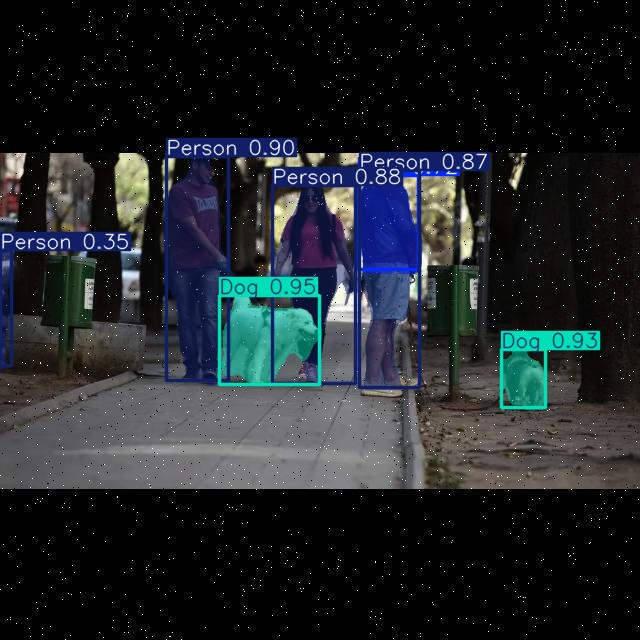

In [20]:
from IPython.display import Image
Image("/content/drive/MyDrive/Segmentation/Segment Dataset/runs/segment/predict3/Captura-de-pantalla-2024-04-22-112004_png_jpg.rf.eb4b0a207022c51b520cce458516cf48.jpg")